Data source: http://www.naturalearthdata.com/features/
- difficulty to use as online download
- not known how/where to put data, modify program to use the local data (maybe use esri/shape_loader)
- 

Ref: Example from http://scitools.org.uk/cartopy/docs/latest/matplotlib/feature_interface.html#cartopy.feature.cartopy.feature.BORDERS

In [ ]:
%matplotlib inline

In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

Benefits for using Mercator:
- good for this EW > NS (this case)
- easy to plot labels
- cartopy support grid ticks of only cylindrical projection
- ref: http://scitools.org.uk/cartopy/docs/latest/matplotlib/gridliner.html

Disadvantages:
- straight meridians cause wrong sense of gloge
- not best with long NS short EW as the case is

Benefits of Transverse Mercator
- better when NS extents is longer
- ASEAN has 2 times longer above equator than below (20S to 40N)
- and main area is centered away from equator

Disadvantages
- software implementation has some limitations
- label ticks cant be generated easily

In [3]:
import cartopy   # v 0.14
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

# TransverseMercator central_longitude=115, others=defaults; see help below
# good due to symmetry N/S, central_longitude=115
class ASEAN2(cartopy.crs.TransverseMercator):
    """
    TM projection for ASEAN domain.
    Ellipsoid is wgs84 (default)

    """
    def __init__(self):
        globe = cartopy.crs.Globe()  # default globe: wgs1984
        super(ASEAN2, self).__init__(central_longitude=115, scale_factor=1.0, globe=globe)

    @property
    def x_limits(self):
        return (-2.95e6, 3.35e6)

    @property
    def y_limits(self):
        return (-1.5e6, 3.75e6)

# To set the extents of the map based on a bounding box, in any coordinate system, use the set_extent() method.
# The above uses x_limits() y_limits() which requires values in meters on UTM.

In [4]:
import numpy as np
# 5 degrees spacing
lats = np.arange(-20,40,5)
lons = np.arange(80,150,5)
color_gray1 = np.array([ 0.93  ,  0.93  ,  0.93])

In [9]:
# TODO: use flags
# - to switch layers ON/OFF
# - to set colors individually

import cartopy.feature as cfeature

plt.figure(figsize=(10, 12))

ax = plt.axes( projection=ASEAN2() )   # make use of ASEAN proj

# Needs admin level 0-1 (countries, provinces)

# These form of code  -- dont work well
# Create a feature for States/Admin 1 regions at 1:50m from Natural Earth
#states_provinces = cfeature.NaturalEarthFeature(
#        category='cultural',
#        name='admin_1_states_provinces_lines',
#        scale='50m',
#        facecolor='none')
#ax.add_feature(states_provinces, edgecolor='gray')
# ***Not available***

# Create a feature for Admin 0
#admin_x = cfeature.NaturalEarthFeature(
#        category='cultural',
#        name='ne_50m_admin_1_states_provinces_lines_shp',
#        scale='50m',
#        facecolor='none')

# Tried: and not worked
# - 110m_admin_1_states_provinces_lines
# - ne_10m_admin_0_boundary_lines_land
# - ne_50m_admin_1_states_provinces_lines_shp
# ax.add_feature(admin_x, edgecolor='gray')

# This is the correct methods:
ax.add_feature(cfeature.OCEAN, facecolor=cfeature.COLORS['water'])  # physical/110m_ocean.shp downloaded by this

# ref: http://scitools.org.uk/cartopy/docs/latest/matplotlib/feature_interface.html#cartopy.feature.cartopy.feature.BORDERS
# physical/50m_land.shp
# status: OK
#land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
#                                        edgecolor='face',
#                                        facecolor=cfeature.COLORS['land'])
#ax.add_feature(land_50m, edgecolor='gray')

# ---file NOT found!---: /naturalearth/50m/physical/ne_50m_rivers.zip **BAD**
# YOU can create it ??
# rivers_50m = cfeature.NaturalEarthFeature('physical', 'rivers', '50m',
#                                         edgecolor='face',
#                                         facecolor=cfeature.COLORS['water'])
# ax.add_feature(rivers_50m, edgecolor='green')

# country polygons at medium scale
# status: OK
#admin0_50m = cfeature.NaturalEarthFeature('cultural', 'admin_0_countries', '50m',
#                                        edgecolor='green',
#                                        facecolor='none')
#ax.add_feature(admin0_50m, edgecolor='gray')


# country polygons, large scale
# status: success
#admin1_10m = cfeature.NaturalEarthFeature('cultural', 'admin_1_states_provinces', '10m',
#                                        edgecolor='green',
#                                        facecolor='yellow')
#ax.add_feature(admin1_10m)

# ne_10m_urban_areas.zip
# polygons, large scale
# status: 
urban_10m = cfeature.NaturalEarthFeature('cultural', 'urban_areas', '10m',
                                        edgecolor='red',
                                        facecolor='yellow')
ax.add_feature(urban_10m)

#ax.add_feature(cfeature.LAKES, edgecolor='blue')  # 110m_lakes.shp is downloaded by this/ no feature in there
ax.add_feature(cfeature.RIVERS, edgecolor='blue', facecolor='none')  # 110m_rivers_lake_centerlines downloaded by this
#ax.add_feature(cfeature.BORDERS, edgecolor='brown') # 110m_admin_0_bound, crude

# files downloaded: features wanted not exist, no provinces bounds
#admin1_50m = cfeature.NaturalEarthFeature('cultural', 'admin_1_states_provinces_lines', '50m',
#                                        edgecolor='gray',
#                                        facecolor='none')
#ax.add_feature(admin1_50m)

# Note it has ne_ prefix when '10m' is used to access datd
# Status OK: show province boundaries, excluding (coast lines, country bounds, lakes)
#admin1_10m_line = cfeature.NaturalEarthFeature('cultural', 'admin_1_states_provinces_lines', '10m',
#                                        edgecolor='gray',
#                                        facecolor='none')
#ax.add_feature(admin1_10m_line)

# cultural/50m_admin_1_states_provinces_lines.zip (no ne_ prefix)
# ---file NOT found!--- it is named "110m_admin_0_boundary_lines_land" same as ax.a)dd_feature(cfeature.BORDERS)
#admin0_50m = cfeature.NaturalEarthFeature('cultural', 'admin_0_states_provinces_lines', '50m',
#                                        edgecolor='gray',
#                                        facecolor='none')
#ax.add_feature(admin0_50m)

# ---file NOT found!--- CAN I Create it?
#admin2_10m = cfeature.NaturalEarthFeature('cultural', 'admin_2_states_provinces_lines', '10m',
#                                        edgecolor='gray',
#                                        facecolor='none')
#ax.add_feature(admin2_10m)


# ax.coastlines() is good!
# Ref: coastlines(resolution='110m', color='black', **kwargs)

# how about admin  -- no shortcut function like .coastlines, use 'cfeature' as above
# ax.coastlines(resolution='10m')  # 50m not perfect/ 10m is too detailed
# 10m was downloaded to .local/share/cartopy/shapefiles/natural_earth/physical
# files: physical/10m_coastline.shp (dbf, shp, shx)

road_10m_f = False
if road_10m_f:
    roads_10m = cfeature.NaturalEarthFeature('cultural', 'roads', '10m',
                                     edgecolor='red',
                                     facecolor='none')  #custom color, how to set alpha color = 'none'
    ax.add_feature(roads_10m)  # has style to draw as above

#ax.tissot(rad_km=200000.0, lons=lons, lats=lats, n_samples=40, facecolor='orange', alpha=0.4)  # OK

# This is OK
gl = ax.gridlines(draw_labels=False, \
             xlocs=[80,90,100,110,120,130,140,150], \
             ylocs=[-20,-10,0,10,20,30,40])  # parrallels/meridians

# Ticks -- error: Cannot handle non-rectangular coordinate systems.
# ax.set_xticks([80,90,100,110,120,130,140,150], minor=False, crs=ccrs.Geodetic())

#TypeError: Cannot label gridlines on a ASEAN2 plot.  Only PlateCarree and Mercator plots are currently supported.
#gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
#                  linewidth=1, color='gray', alpha=0.3, linestyle='--')


C:\Users\swatc\Anaconda3\envs\cartopy\lib\site-packages\cartopy\io\__init__.py:264: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/10m/cultural/ne_10m_urban_areas.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


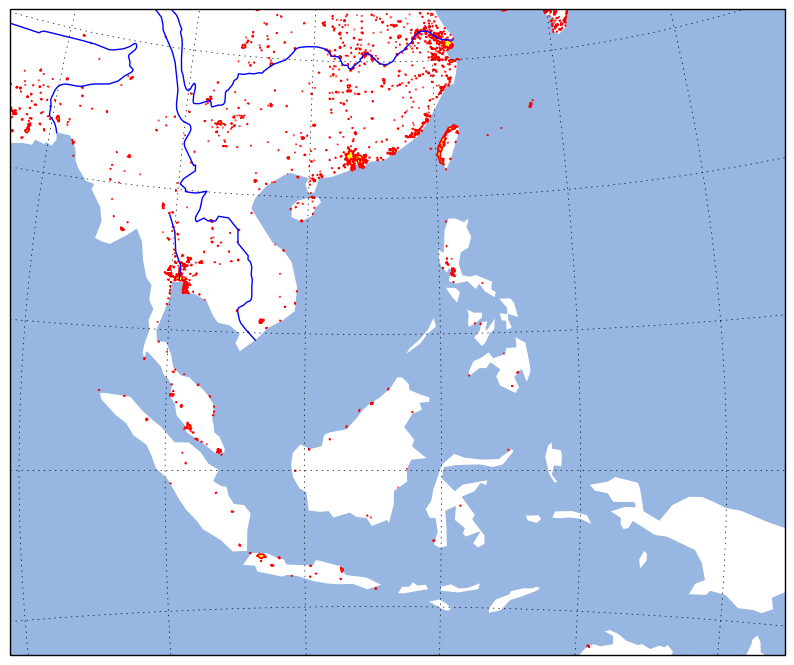

In [10]:
plt.show()

Comment:
- parallels and meridians are not as expected when use default
- OK now with custom values
- UTM zone 50 causes un-symmetry meridian, unsymmetry -x +x limits
- TM with CM = 115 is good.

TODO:
- plot it external to notebook, capture locations for lat-long labels
- plot labels for values of lat and long to annotate the graticule

## Using Local Shape Files

In [ ]:
# Tried, success
# Shall we copy files to this place
from cartopy.io import shapereader
ne_shp = shapereader.Reader('shape_files/ne_10m_admin_0_boundary_lines_land.shp')
ax = plt.axes(projection=ccrs.PlateCarree())  # what is best projection ?
ax.set_extent([95, 110, 0, 25])  # Thailand
#ax.add_feature(ne_shp.geometries())  # geometry / record see help down below..
ax.add_geometries(ne_shp.geometries(), ccrs.Geodetic(), facecolor='none')

In [ ]:
plt.show()

In [ ]:
help(ax.add_feature)

## TODO

- ax.annotate: can be used to add text on map, http://matplotlib.org/users/annotations_intro.html
- to get coordinates, one can read from cursor position on map (x,y)
- if use (lat, long), may need coord tranformation